### Task 1: Insert data from .csv file into Dataframe.

In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv("Spotify Most Streamed Songs.csv")
print(list(df.columns))
df.head(5)

['track_name', 'artist(s)_name', 'artist_count', 'released_year', 'released_month', 'released_day', 'in_spotify_playlists', 'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts', 'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%', 'cover_url']


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...


### Task 2: Basic Descriptive Statistics

#### 2.1: Conversion of some columns from object to int32

In [2]:

df['streams'] = pd.to_numeric(df['streams'], errors = 'coerce')
df['artist_count'] = pd.to_numeric(df['artist_count'], errors = 'coerce')
df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors = 'coerce')
df['in_spotify_charts'] = pd.to_numeric(df['in_spotify_charts'], errors = 'coerce')
df['in_apple_playlists'] = pd.to_numeric(df['in_apple_playlists'], errors = 'coerce')
df['danceability_%'] = pd.to_numeric(df['danceability_%'], errors = 'coerce')
df['valence_%'] = pd.to_numeric(df['valence_%'], errors = 'coerce')
df['energy_%'] = pd.to_numeric(df['energy_%'], errors = 'coerce')
df['acousticness_%'] = pd.to_numeric(df['acousticness_%'], errors = 'coerce')
df['instrumentalness_%'] = pd.to_numeric(df['instrumentalness_%'], errors = 'coerce')
df['liveness_%'] = pd.to_numeric(df['liveness_%'], errors = 'coerce')
df['speechiness_%'] = pd.to_numeric(df['speechiness_%'], errors = 'coerce')

df.dropna(subset = ['streams'], inplace = True)
df['streams'] = df['streams'].astype('uint')

df.head(2)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...


#### 2.2: Insert new column 'Date' and remove Year, Month and Day columns.

In [3]:

df['released_year'] = pd.to_numeric(df['released_year'], errors='coerce')
df['released_month'] = pd.to_numeric(df['released_month'], errors='coerce')
df['released_day'] = pd.to_numeric(df['released_day'], errors='coerce')
df.dropna(subset=['released_year', 'released_month', 'released_day'], inplace=True)


df['released_year'] = df['released_year'].astype(int)
df['released_month'] = df['released_month'].astype(int)
df['released_day'] = df['released_day'].astype(int)


df['Date'] = pd.to_datetime({
    'year' : df['released_year'],
    'month' : df['released_month'],
    'day' : df['released_day']},
    errors = 'coerce'
)

column_to_move = df.pop('Date')
df.insert(3, 'Date', column_to_move)

df.drop(['released_year', 'released_month', 'released_day'], axis = 1, inplace = True)
df.rename(columns = {'Released date' : 'Released_date'}, inplace = True)

df['streams'] = pd.to_numeric(df['streams'], errors = 'coerce')

df.dropna(subset = ['streams'], inplace = True)
print(df['streams'].dtype)
df.head(2)




uint32


,track_name,artist(s)_name,artist_count,Date,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023-07-14,553,147,141381703,43,263,45,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023-03-23,1474,48,133716286,48,126,58,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...


#### 2.3: Calculate summary statistics based on streams and keys

In [4]:

df['streams'] = df['streams'].astype('uint64')

average_streams = df['streams'].mean()
most_streams = df['streams'].max()
least_streams = df['streams'].min()


total_number_of_songs = df['track_name'].count()

print('Number of songs:',total_number_of_songs)
print('Average streams:',int(average_streams))
print('Most streams:',most_streams)
print('Least stream', least_streams)

filter_df_based_key = df.groupby('key').agg(
    #most_stream_song=('track_name', lambda x: x[df.loc[x.index, 'streams'].idxmax()]),
    most_streams = ('streams', 'max'),
    most_stream_song = ('track_name', lambda x : x[df.loc[x.index, 'streams'].idxmax()]),
    total_stream = ('streams', 'sum'),
    average_stream = ('streams', 'mean'),
    track_count = ('track_name', 'count'),
    in_apple_playlists = ('in_apple_playlists', 'count'),
    in_apple_charts = ('in_apple_charts', 'count'),
    in_deezer_playlists	= ('in_deezer_playlists', 'count'),
    average_danceability_percentage = ('danceability_%', 'mean'),
    valence_percentage = ('valence_%', 'mean'),
    energy_percentage = ('energy_%', 'mean'),
    acousticness_percentage = ('acousticness_%', 'mean'),
    instrumentalness_percentage = ('instrumentalness_%', 'mean'),
    liveness_percentage = ('liveness_%', 'mean'),
    speechiness_percentage = ('speechiness_%', 'mean')
    
)
filter_df_based_key['average_stream'] = filter_df_based_key['average_stream'].astype('uint64')
filter_df_based_key = filter_df_based_key.round(2)

filter_df_based_key.sort_values(by = 'total_stream', ascending = False, inplace = False)
filter_df_based_key.reset_index(inplace = True)
filter_df_based_key




Number of songs: 952
Average streams: 514137424
Most streams: 3703895074
Least stream 2762


,key,most_streams,most_stream_song,total_stream,average_stream,track_count,in_apple_playlists,in_apple_charts,in_deezer_playlists,average_danceability_percentage,valence_percentage,energy_percentage,acousticness_percentage,instrumentalness_percentage,liveness_percentage,speechiness_percentage
0,A,2484812918,Seï¿½ï¿½o,30254264458,408841411,74,74,74,74,64.11,46.84,60.09,29.19,2.42,17.93,9.36
1,A#,2594040133,Believer,31491099814,552475435,57,57,57,57,68.79,52.60,62.79,26.51,0.30,15.53,11.91
2,B,2557975762,Heat Waves,42067184540,519347957,81,81,81,81,69.49,53.59,68.00,24.05,1.20,18.10,10.42
3,C#,3703895074,Blinding Lights,72513629843,604280248,120,120,120,120,68.64,49.79,66.55,21.07,1.24,18.24,12.07
4,D,2808096550,Sunflower - Spider-Man: Into the Spider-Verse,42891570295,529525559,81,81,81,81,67.80,49.91,63.53,27.88,1.40,18.67,9.32
5,D#,1840364617,Demons,18250205825,553036540,33,33,33,33,64.55,46.67,62.85,29.09,2.91,17.36,11.15
6,E,2355719893,lovely - Bonus Track,35804825731,577497189,62,62,62,62,65.03,40.95,62.11,31.65,2.35,18.95,9.03
7,F,1788326445,Do I Wanna Know?,41691728620,468446388,89,89,89,89,67.10,52.94,64.38,28.43,2.60,18.09,9.76
8,F#,2864791672,Dance Monkey,38132510024,522363151,73,73,73,73,68.23,59.86,66.73,30.37,0.53,18.75,10.44
9,G,2565529693,Starboy,43449542493,452599400,96,96,96,96,67.45,53.51,63.72,26.69,1.58,17.77,8.77


#### 2.4: Most streamed songs by key(continue)

In [5]:
key_group_df = df.groupby('key')
most_streamed_song_by_key = key_group_df.apply(lambda x : x.loc[x['streams'].idxmax()])
most_streamed_song_by_key.reset_index(drop = True, inplace = True)
columns = ['key'] + [col for col in df.columns if col != 'key']


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_17400\2105220208.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  most_streamed_song_by_key = key_group_df.apply(lambda x : x.loc[x['streams'].idxmax()])


#### 2.5: Most streamed songs by date

In [6]:
df.rename(columns = {'Date' : 'Released_date'}, inplace = True)
df.head(10)

,track_name,artist(s)_name,artist_count,Released_date,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023-07-14,553,147,141381703,43,263,45,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,Myke Towers,1,2023-03-23,1474,48,133716286,48,126,58,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,Olivia Rodrigo,1,2023-06-30,1397,113,140003974,94,207,91,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...
3,Cruel Summer,Taylor Swift,1,2019-08-23,7858,100,800840817,116,207,125,...,A,Major,55,58,72,11,0,11,15,https://i.scdn.co/image/ab67616d0000b273e787cf...
4,WHERE SHE GOES,Bad Bunny,1,2023-05-18,3133,50,303236322,84,133,87,...,A,Minor,65,23,80,14,63,11,6,https://i.scdn.co/image/ab67616d0000b273ab5c9c...
5,Sprinter,"Dave, Central Cee",2,2023-06-01,2186,91,183706234,67,213,88,...,C#,Major,92,66,58,19,0,8,24,https://i.scdn.co/image/ab67616d0000b273e3a09a...
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,2023-03-16,3090,50,725980112,34,222,43,...,F,Minor,67,83,76,48,0,8,3,https://i.scdn.co/image/ab67616d0000b2732071a0...
7,Columbia,Quevedo,1,2023-07-07,714,43,58149378,25,89,30,...,F,Major,67,26,71,37,0,11,4,https://i.scdn.co/image/ab67616d0000b273a00a81...
8,fukumean,Gunna,1,2023-05-15,1096,83,95217315,60,210,48,...,C#,Minor,85,22,62,12,0,28,9,https://i.scdn.co/image/ab67616d0000b273017d5e...
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2023-03-17,2953,44,553634067,49,110,66,...,D,Minor,81,56,48,21,0,8,33,Not Found


In [7]:
year_group_df = df.groupby(df['Released_date'].dt.year).agg(
    Total_songs = ('track_name', 'count'),
    Total_streams = ('streams', 'sum'),
    Most_streams = ('streams', 'max'),
    Most_streamed_song = ('track_name', lambda x: x[df.loc[x.index, 'streams'].idxmax()]),
    Artists_name = ('artist(s)_name', lambda x: x[df.loc[x.index, 'streams'].idxmax()]),
    Average_streams = ('streams', 'mean')
)
year_group_df['Average_streams'] = year_group_df['Average_streams'].astype('uint64')
year_group_df = year_group_df.reset_index()
year_group_df

,Released_date,Total_songs,Total_streams,Most_streams,Most_streamed_song,Artists_name,Average_streams
0,1930,1,90598517,90598517,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",90598517
1,1942,1,395591396,395591396,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",395591396
2,1946,1,389771964,389771964,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,389771964
3,1950,1,473248298,473248298,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",473248298
4,1952,1,395591396,395591396,A Holly Jolly Christmas - Single Version,Burl Ives,395591396
5,1957,2,919962022,741301563,Jingle Bell Rock,Bobby Helms,459981011
6,1958,3,1310562937,769213520,Rockin' Around The Christmas Tree,Brenda Lee,436854312
7,1959,2,573417844,446390129,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,286708922
8,1963,3,1311263381,663832097,It's the Most Wonderful Time of the Year,Andy Williams,437087793
9,1968,1,1145727611,1145727611,Have You Ever Seen The Rain?,Creedence Clearwater Revival,1145727611


### Task 3: Illustrate the data with graphs

In [8]:
year_group_df['Most_streams'] = year_group_df['Most_streams'].astype(float)
year_group_df.rename(columns = {'Most_streams': 'Most_streams(Millions)'}, inplace = True)
year_group_df['Most_streams(Millions)'] = year_group_df['Most_streams(Millions)'] / 1000000

year_group_df.rename(columns = {'Total_streams' : 'Total_streams(Millions)'}, inplace = True)
year_group_df['Total_streams(Millions)'] = year_group_df['Total_streams(Millions)'] / 1000000
year_group_df.rename(columns = {'Average_streams' : 'Average_streams(Millions)'}, inplace = True)
year_group_df['Average_streams(Millions)'] = year_group_df['Average_streams(Millions)'] / 1000000

year_group_df = year_group_df.round(2)

#### 3.1: Most streamed songs by year illustration

,Released_date,Total_songs,Total_streams(Millions),Most_streams(Millions),Most_streamed_song,Artists_name,Average_streams(Millions)
0,1930,1,90.60,90.60,Agudo Mï¿½ï¿½gi,"Styrx, utku INC, Thezth",90.60
1,1942,1,395.59,395.59,White Christmas,"Bing Crosby, John Scott Trotter & His Orchestr...",395.59
2,1946,1,389.77,389.77,The Christmas Song (Merry Christmas To You) - ...,Nat King Cole,389.77
3,1950,1,473.25,473.25,Let It Snow! Let It Snow! Let It Snow!,"Frank Sinatra, B. Swanson Quartet",473.25
4,1952,1,395.59,395.59,A Holly Jolly Christmas - Single Version,Burl Ives,395.59
5,1957,2,919.96,741.30,Jingle Bell Rock,Bobby Helms,459.98
6,1958,3,1310.56,769.21,Rockin' Around The Christmas Tree,Brenda Lee,436.85
7,1959,2,573.42,446.39,Let It Snow! Let It Snow! Let It Snow!,Dean Martin,286.71
8,1963,3,1311.26,663.83,It's the Most Wonderful Time of the Year,Andy Williams,437.09
9,1968,1,1145.73,1145.73,Have You Ever Seen The Rain?,Creedence Clearwater Revival,1145.73


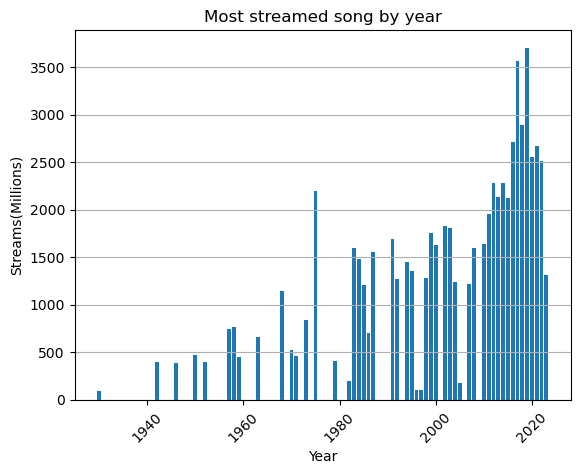

In [9]:
import matplotlib.pyplot as plt

plt.bar(year_group_df['Released_date'], year_group_df['Most_streams(Millions)'])
plt.title('Most streamed song by year')
plt.xlabel('Year')
plt.ylabel('Streams(Millions)')
plt.xticks(rotation=45) 
plt.grid(axis='y')


#plt.show()
year_group_df



#### 3.4: Total streams by year illustration

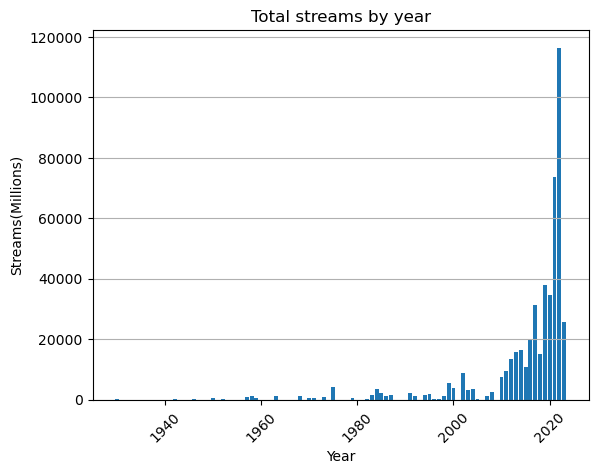

In [10]:
plt.bar(year_group_df['Released_date'], year_group_df['Total_streams(Millions)'])
plt.title('Total streams by year')
plt.xlabel('Year')
plt.ylabel('Streams(Millions)')
plt.xticks(rotation=45) 
plt.grid(axis = 'y')
plt.show()

#### Task 4: Artist rankings

In [14]:
if not isinstance(df['artist(s)_name'].iloc[0], list):
    df['artist(s)_name'] = df['artist(s)_name'].str.split(',')
df.head(3)

,track_name,artist(s)_name,artist_count,Released_date,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,in_deezer_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,cover_url
0,Seven (feat. Latto) (Explicit Ver.),"[Latto, Jung Kook]",2,2023-07-14,553,147,141381703,43,263,45,...,B,Major,80,89,83,31,0,8,4,Not Found
1,LALA,[Myke Towers],1,2023-03-23,1474,48,133716286,48,126,58,...,C#,Major,71,61,74,7,0,10,4,https://i.scdn.co/image/ab67616d0000b2730656d5...
2,vampire,[Olivia Rodrigo],1,2023-06-30,1397,113,140003974,94,207,91,...,F,Major,51,32,53,17,0,31,6,https://i.scdn.co/image/ab67616d0000b273e85259...


#### 4.1: Creates a new version of the DataFrame where each artist appears in a separate row and then perform some summary calculations

In [35]:
artist_df = df.explode('artist(s)_name')
artist_df['artist(s)_name'] = artist_df['artist(s)_name'].str.strip()


artist_ranking = artist_df.groupby('artist(s)_name').agg(
    Appearance_count = ('artist(s)_name', 'count'),
    Total_streams = ('streams', 'sum'),
    Most_streamed_song = ('track_name', lambda x: x[artist_df.loc[x.index, 'streams'].idxmax()])
).reset_index()
artist_ranking.sort_values(by = 'Total_streams', ascending = False, inplace = True)
artist_ranking.dropna(inplace = True)
artist_ranking.head(20)


,artist(s)_name,Appearance_count,Total_streams,Most_streamed_song
628,The Weeknd,37,23929760757,Blinding Lights
67,Bad Bunny,40,23813527270,Dakiti
186,Ed Sheeran,14,15316587718,Shape of You
608,Taylor Swift,38,14630378183,Blank Space
245,Harry Styles,17,11608645649,As It Was
197,Eminem,9,10193727260,Lose Yourself - Soundtrack Version
182,Dua Lipa,9,9980020481,Don't Start Now
300,Justin Bieber,7,8243081039,STAY (with Justin Bieber)
181,Drake,19,8043031261,One Dance
61,BTS,13,7780428159,Dynamite


#### 4.2: Ranking illustrate with graphs

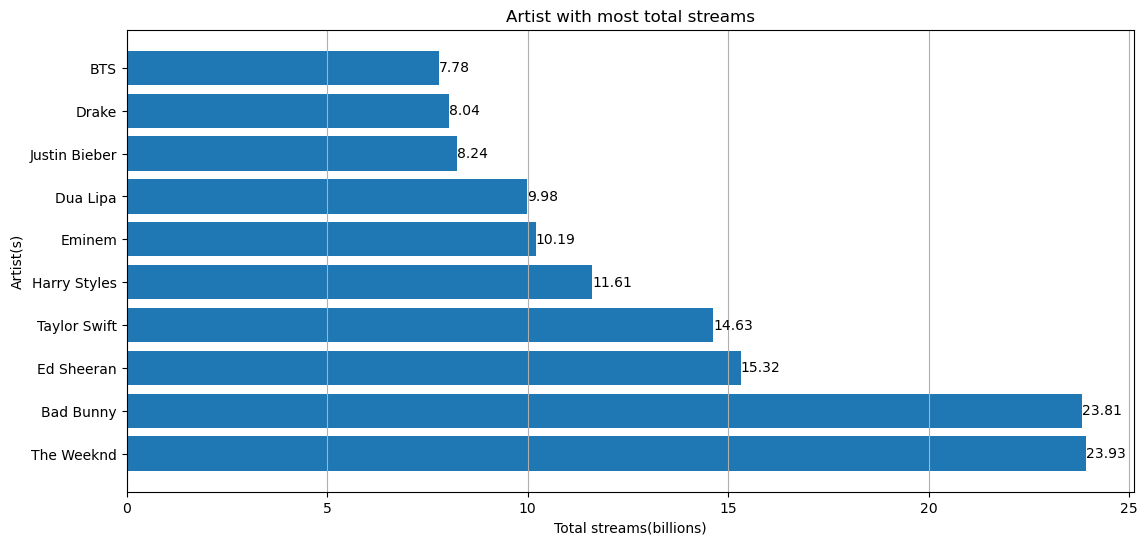

In [47]:
top_10_artists = artist_ranking.nlargest(10, 'Total_streams')
plt.figure(figsize=(13, 6))
plt.barh(top_10_artists['artist(s)_name'], top_10_artists['Total_streams'] / 1000000000)
plt.title('Artist with most total streams')
plt.xlabel('Total streams(billions)')
plt.ylabel('Artist(s)')
#plt.yticks(rotation = 45)
plt.grid(axis = 'x')
for index, value in enumerate(top_10_artists['Total_streams'] / 1000000000):
    plt.text(value, index, f'{value:.2f}', va='center')  # Format to 2 decimal places
plt.show()

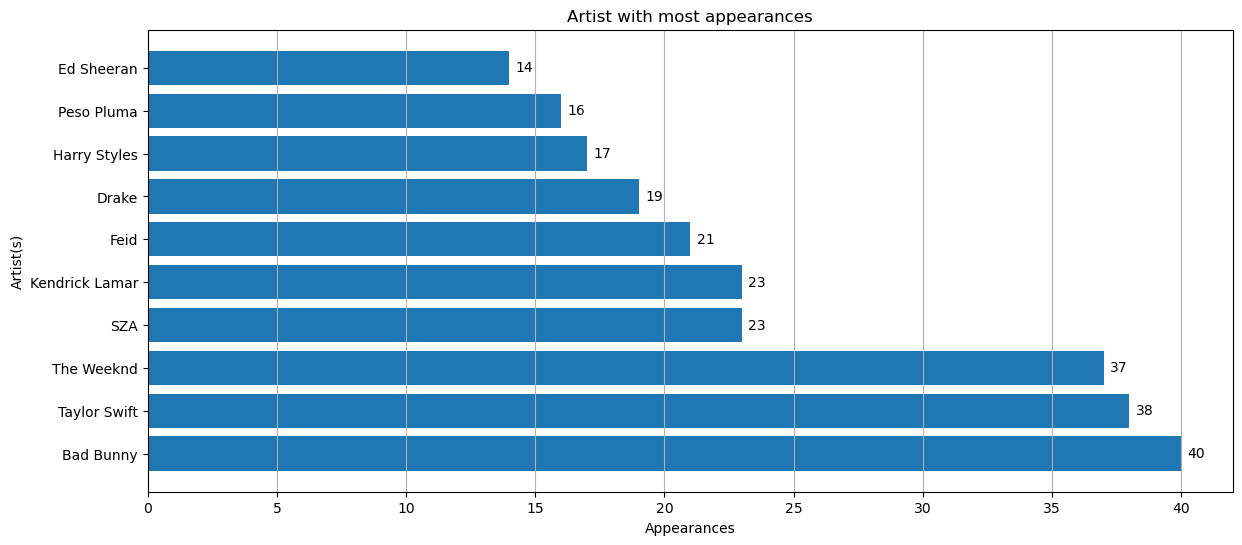

In [53]:
top_10_artists = artist_ranking.nlargest(10, 'Appearance_count')
plt.figure(figsize = (14, 6))
plt.barh(top_10_artists['artist(s)_name'], top_10_artists['Appearance_count'])
plt.title('Artist with most appearances')
plt.xlabel('Appearances')
plt.ylabel('Artist(s)')
#plt.yticks(rotation = 45)
plt.grid(axis = 'x')

for index, value in enumerate(top_10_artists['Appearance_count']):
    plt.text(value + 0.25, index, f'{value}', va = 'center')

plt.show()